In [119]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap
import importlib
importlib.reload(imd_nd_smap)

<module 'manifold_learning.imd_nd_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_nd_smap.py'>

In [38]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [3]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [4]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [4]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [5]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [147]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=1,subtract_corr=True, device="cuda")


In [178]:
trainer.fit(observables, sample_len=50, library_len=700, 
            exclusion_rad=20, omega=2, tp=100, 
            epochs=300, num_batches=32,optimizer="Adagrad", learning_rate=0.1,tp_policy="range")


Epoch 1/300, Loss: 0.4311
Epoch 2/300, Loss: 0.7343
Epoch 3/300, Loss: 0.6575
Epoch 4/300, Loss: 0.6355
Epoch 5/300, Loss: 0.5963
Epoch 6/300, Loss: 0.5886
Epoch 7/300, Loss: 0.5562
Epoch 8/300, Loss: 0.5691
Epoch 9/300, Loss: 0.5586
Epoch 10/300, Loss: 0.5562
Epoch 11/300, Loss: 0.5495
Epoch 12/300, Loss: 0.5303
Epoch 13/300, Loss: 0.5234
Epoch 14/300, Loss: 0.5250
Epoch 15/300, Loss: 0.5493
Epoch 16/300, Loss: 0.5404
Epoch 17/300, Loss: 0.5104
Epoch 18/300, Loss: 0.5147
Epoch 19/300, Loss: 0.5377
Epoch 20/300, Loss: 0.5419
Epoch 21/300, Loss: 0.5266
Epoch 22/300, Loss: 0.5107
Epoch 23/300, Loss: 0.5049
Epoch 24/300, Loss: 0.5433
Epoch 25/300, Loss: 0.5390
Epoch 26/300, Loss: 0.5176
Epoch 27/300, Loss: 0.4874
Epoch 28/300, Loss: 0.5125
Epoch 29/300, Loss: 0.5391
Epoch 30/300, Loss: 0.5222
Epoch 31/300, Loss: 0.4915
Epoch 32/300, Loss: 0.4728
Epoch 33/300, Loss: 0.5111
Epoch 34/300, Loss: 0.5023
Epoch 35/300, Loss: 0.4969
Epoch 36/300, Loss: 0.4977
Epoch 37/300, Loss: 0.4876
Epoch 38/3

KeyboardInterrupt: 

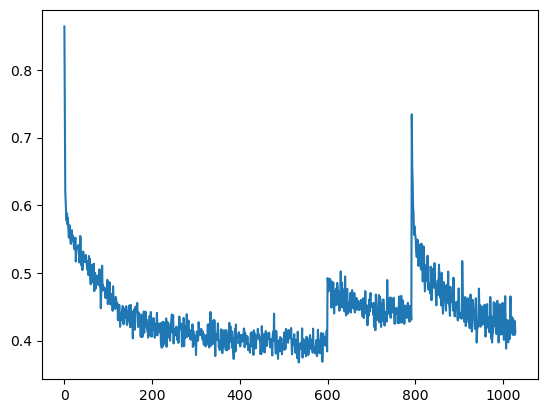

In [179]:
plt.plot(trainer.get_loss_history()[:])


In [180]:

unmixed = trainer.predict(observables)

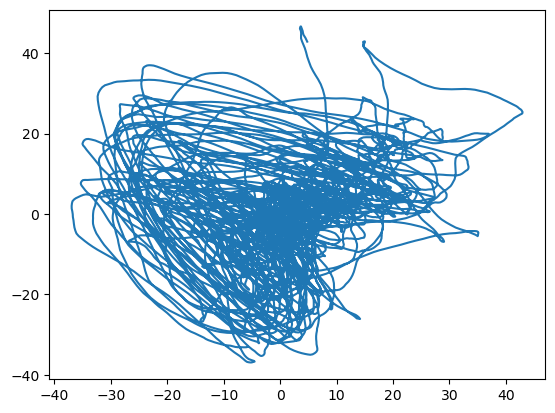

In [181]:
plt.plot(unmixed[50:,0,2],unmixed[:-50,0,2])

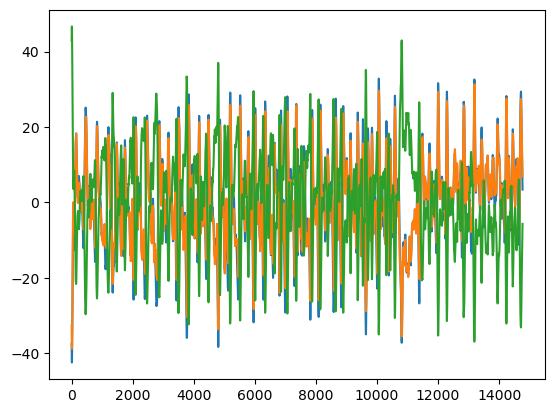

In [182]:

plt.plot(unmixed[:,0,:])
#plt.xlim(0,2000)

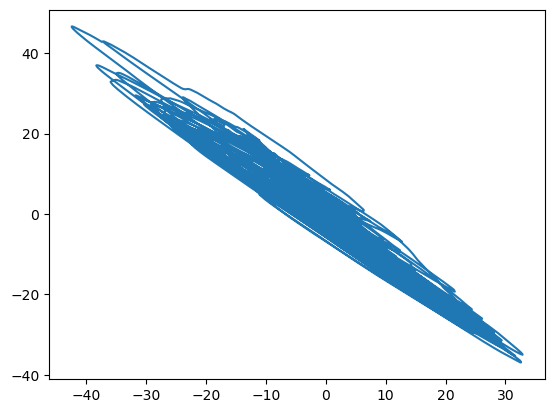

In [183]:
plt.plot(unmixed[:,0,0], unmixed[:,0,2])

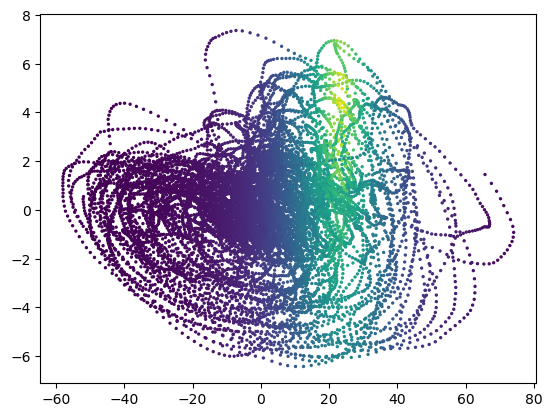

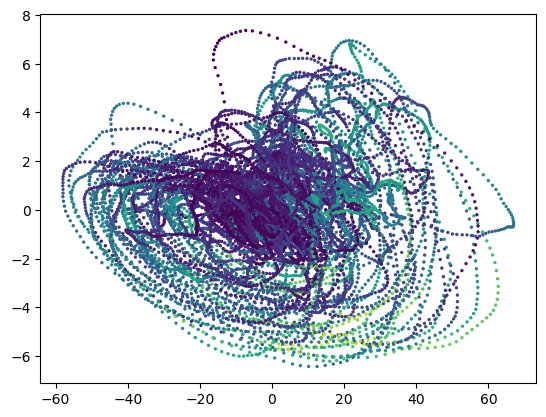

In [188]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,0][[5100]],unmixed[:,0])[0]
weights = np.exp(-(2*dist/dist.mean()))

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[:-50,0],x_pca[:-50,1],c=weights[:-50],s=2)
plt.show()

plt.scatter(x_pca[50:,0],x_pca[50:,1],c=weights[:-50],s=2)

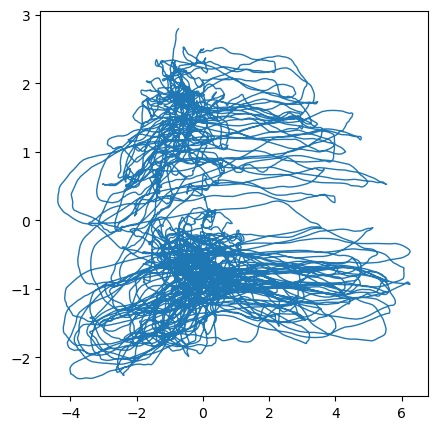

In [173]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

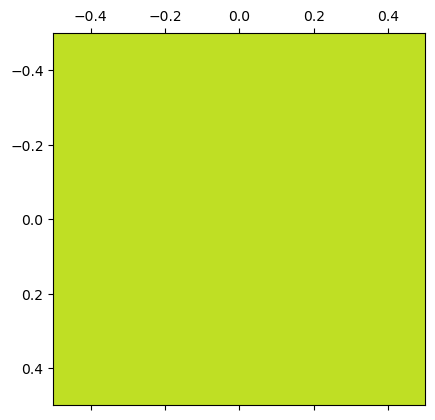

In [174]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,60,False).mean(axis=0),vmin=0,vmax=1)

In [175]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,0,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [176]:
fig = px.line_3d(x=unmixed[:,0,0], y=unmixed[:,0,1],z=unmixed[:,0,2],height=700)

fig.show()